In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

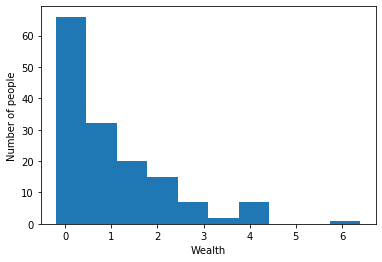

In [2]:
#Basic Model 
npeople = 150
wealth = np.ones(npeople)
nsteps = 10000
coin = .2



for t in range(nsteps):
    p1 = np.random.randint(low = 0, high = npeople)
    p2 = np.random.randint(low = 0, high = npeople)
    
    if wealth[p1] > 0:
        wealth[p1] -= coin 
        wealth[p2] += coin 
        
plt.hist(wealth);
plt.xlabel("Wealth");
plt.ylabel("Number of people");


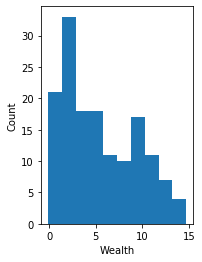

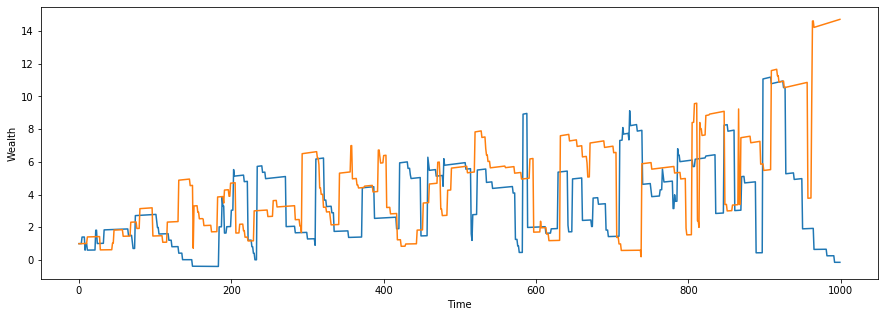

In [3]:
#Remember Everything Model 
npeople = 150
nsteps = 1000
interest = 0.001

wealth = np.ones(shape = (nsteps,npeople))

coin = .4
trades = 10

gini_history = np.zeros(nsteps)



for t in range(1,nsteps):
    wealth[t,:] = wealth [t-1,:]*(1 + interest)
    for i in range(trades):
        p1 = np.random.randint(low = 0, high = npeople)
        p2 = np.random.randint(low = 0, high = npeople)

        if wealth[t,p1] > 0:
            wealth[t,p1] = wealth[t-1,p1] - coin 
            wealth[t,p2] = wealth[t-1,p1] + coin 

        
plt.subplot(1,2,1)
plt.hist(wealth[-1,:]);
plt.xlabel("Wealth");
plt.ylabel("Count");
plt.figure(figsize = (15,5))
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:, poor_one])
plt.plot(wealth[:, rich_one])
plt.xlabel("Time");
plt.ylabel("Wealth");




In [12]:
def gini(x):
    y = np.sort(x)
    upper_sum = 0 
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)* y[i]
    return 1 - 2/(n-1) * (n - upper_sum/sum(y))
    
print(gini([1,1,1]))
print(gini([1,0,0,0]))

0.0
1.0


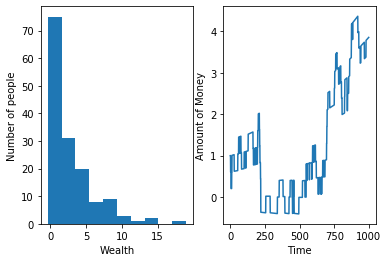

In [4]:
#RCompound Interest Model 
npeople = 150
nsteps = 1000

wealth = np.ones(shape = (nsteps,npeople))

coin = .4
trades = 10
interest = 0.001





for t in range(1,nsteps):
    wealth[t,:] = wealth [t-1,:]*(1 + interest)
    for i in range(trades):
        p1 = np.random.randint(low = 0, high = npeople)
        p2 = np.random.randint(low = 0, high = npeople)

        if wealth[t,p1] > 0:
            wealth[t,p1]  -= coin 
            wealth[t,p2] +=coin 

        
plt.subplot(1,2,1)
plt.hist(wealth[-1,:]);
plt.xlabel("Wealth");
plt.ylabel("Number of people");
plt.subplot(1,2,2);
plt.plot(wealth[:,0]);
plt.xlabel("Time");
plt.ylabel("Amount of Money");


